# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Largest Global Company CO₂ Emissions by [Carbon Majors](https://carbonmajors.org/Downloads)

Who:
- This dataset would be useful for policymakers, environmental and climate change advocates, and regulators seeking to monitor large oil, gas, coal, and cement producers and their emissions. For example, this could be presented to a congressional subcommittee that deal with the energy industry. 

What:
- Based on the findings of the dataset, Environmental and climate change advocates should take these findings of the largest CO2 producers and advocate for bold climate policies in order to further along the transition from dirty energy to clean energy while having stricter emissions policies. The policymakers and regulators should take action by adopting or creating new regulations for stronger enforcement of emissions levels in order to reduce carbon dioxide emissions. 

- Overall the tone of the presentation of these findings should have a serious and urgent tone, but one that is also empowering the audience because they are in positions of power to create positive change.

How:
- In order to effectively deliver this information to the audience, highlighting the before and after effect of emissions from these companies would be an attention grabber in order to understand the gravity of what is happening. Providing supplemental information about the share of emissions these companies have in comparison to the rest of the market could potentially be a beneficial comparison to make in order to fully understand the effect these few companies have. The presentation should focus on the big idea where these small number of companies are contributing to a significant proportion of global emissions and that we must have systemic decarbonization efforts.


# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [2]:
co2_data = pd.read_csv('../Datasets\emissions_high_granularity.csv')

In [3]:
cols = co2_data.columns.tolist()

for i in cols:
    print(i)

year
parent_entity
parent_type
lei
reporting_entity
commodity
production_value
production_unit
product_emissions_MtCO2
flaring_emissions_MtCO2
venting_emissions_MtCO2
own_fuel_use_emissions_MtCO2
fugitive_methane_emissions_MtCO2e
fugitive_methane_emissions_MtCH4
total_operational_emissions_MtCO2e
total_emissions_MtCO2e
source


In [4]:
co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20054 entries, 0 to 20053
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                20054 non-null  int64  
 1   parent_entity                       20054 non-null  object 
 2   parent_type                         20054 non-null  object 
 3   lei                                 14184 non-null  object 
 4   reporting_entity                    20054 non-null  object 
 5   commodity                           20054 non-null  object 
 6   production_value                    20054 non-null  float64
 7   production_unit                     20054 non-null  object 
 8   product_emissions_MtCO2             20054 non-null  float64
 9   flaring_emissions_MtCO2             20054 non-null  float64
 10  venting_emissions_MtCO2             20054 non-null  float64
 11  own_fuel_use_emissions_MtCO2        20054

The majority of the features are numerical (int64 & float64) as expected. There are a few features that have object data types meaning they are likely strings, but that is not for certain. Further examination of those columns will be needed.

In [5]:
co2_data.describe(include=['object'])

,parent_entity,parent_type,lei,reporting_entity,commodity,production_unit,source
count,20054,20054,14184,20054,20054,20054,20049
unique,178,3,132,518,9,4,3165
top,Chevron,Investor-owned Company,WPTL2Z3FIYTHSP5V2253,Westmoreland Coal Company,Oil & NGL,Million tonnes/yr,No source as data is interpolated
freq,1177,11761,843,495,6104,8099,2696


As expected, the object features contain strings: parent_entity (company name), parent_type (how the company is structured/owned), lei (some sort of alphanumeric string), reporting_entity (company name), commodity (what the company produces), production_unit (how the commodity is measured), and source (extra information about how the data for that sample was gathered). 

Data Dictionary confirmation:

![Data Dictionary](imgs/ClimateMajorsDataDictionary1.png)
![Data Dictionary](imgs/ClimateMajorsDataDictionary2.png)

In [6]:
co2_data.describe()

,year,production_value,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,own_fuel_use_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_operational_emissions_MtCO2e,total_emissions_MtCO2e
count,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000
mean,1991.777551,276.922389,63.065083,0.428360,0.393223,0.591164,7.108962,0.253891,8.521709,71.586792
std,28.117196,1083.344708,151.219574,1.624817,1.646987,3.247132,19.496344,0.696298,23.921507,170.206547
min,1854.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1977.000000,7.442290,5.290206,0.000000,0.000000,0.000000,0.534642,0.019094,0.642354,6.237412
50%,2000.000000,36.752115,18.870009,0.005763,0.015552,0.000000,2.111310,0.075404,2.511458,22.073287
75%,2013.000000,177.961166,55.385376,0.124466,0.236440,0.037226,6.577038,0.234894,7.861343,64.345465
max,2024.000000,27192.000000,3412.456438,27.026872,41.458662,83.203465,401.881115,14.352897,529.064965,3797.959305


This provides more context in how the data is structured and scaled. There are 20,054 total samples in this dataset. The min and max for the year column shows that this data was collected from 1854 to 2024. Looking at other features, you can start to see that there may be some missing data. For example, the min for all the features besides year is 0. Since this dataset is about the top CO2 emitting companies, it is unlikely that these numbers are 0. However, it might also mean that the company has not been established in that year so it is marked as 0. It's important to keep that in mind when further exploring the data before I clean it up.

In [7]:
# Checking for duplicate samples

co2_duplicates = co2_data[co2_data.duplicated()]
co2_duplicates

,year,parent_entity,parent_type,lei,reporting_entity,commodity,production_value,production_unit,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,own_fuel_use_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_operational_emissions_MtCO2e,total_emissions_MtCO2e,source


There are no duplicate samples.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data (p. 1-17). Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

#### Chart to rebuild
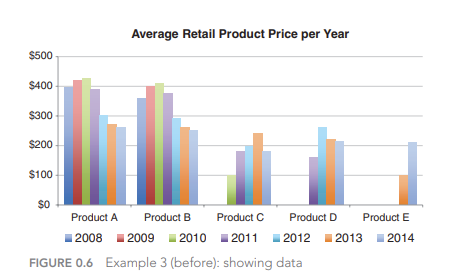

In [62]:
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']

data = {
    '2008': [400, 370, 0, 0, 0],
    '2009': [415, 400, 0, 0, 0],
    '2010': [420, 410, 100, 0, 0],
    '2011': [390, 380, 180, 160, 0],
    '2012': [300, 290, 200, 260, 0],
    '2013': [270, 260, 240, 215, 100],
    '2014': [260, 250, 180, 210, 210]
}

df = pd.DataFrame(data, index=products)

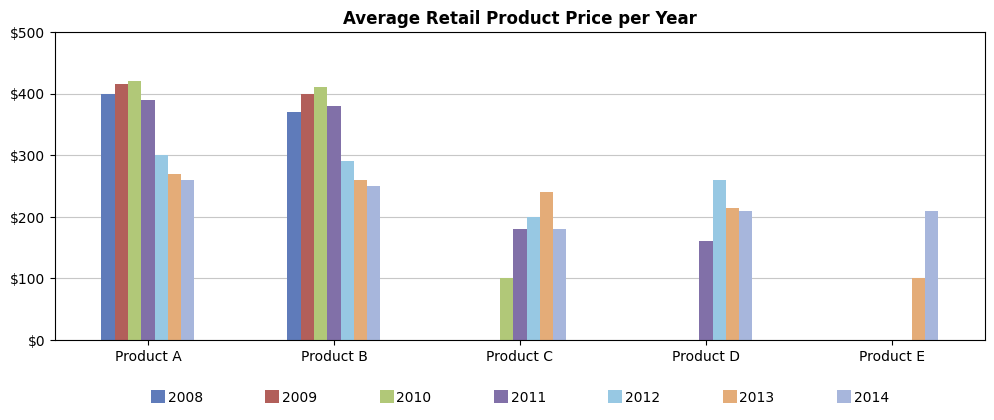

In [66]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

colors = ['#5f7bba', '#b25f5a', '#b1c878', '#8170a8', '#97c8e3', '#e4ac78', '#a7b6dc']

ax = df.plot.bar(figsize=(12,4), color=colors)

ax.tick_params(axis='x', rotation=0)
ax.set_axisbelow(True) # puts the grid behind the bars
ax.grid(axis='y', linestyle='-', alpha=0.7)

fmt = '${x:.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

ax.set_title('Average Retail Product Price per Year',
             fontweight='bold')
ax.set_yticks([0, 100, 200, 300, 400, 500])

ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, -0.25), 
          ncol=7, 
          frameon=False, 
          handletextpad=0.2,
          columnspacing=4.5,
          handlelength=1.0,
          handleheight=1.0)

plt.show()